## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import ttest_ind

# **Transaction DatasSet**

In [2]:
df_transaction = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/QVI_transaction_data.xlsx")
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


# **Customer DataSet**

In [3]:
customer = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/QVI_purchase_behaviour.csv")
customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# **Merge Dataset**

In [4]:
dataset = pd.merge(df_transaction, customer, on = "LYLTY_CARD_NBR", how = "left")
dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


# **Exploratory Data Analysis**
**Rename Comuns to become meaningful**

In [5]:
dataset = dataset.rename(columns = {"DATE" : "Date",
                                    "LYLTY_CARD_NBR" : "Card No",
                          "LIFESTAGE" : "Group",
                          "PREMIUM_CUSTOMER" : "Subcription",
                          "Date" : "Date",
                          "STORE_NBR" : "Store Id",
                          "TXN_ID" : "Transaction Id",
                          "PROD_NBR" : "Product Id",
                          "PROD_NAME" : "Product",
                          "PROD_QTY" : "Quantity",
                          "TOT_SALES" : "Sales"})
dataset.head()

,Date,Store Id,Card No,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subcription
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


**Examine Data Types**

In [6]:
dataset.dtypes

Date                int64
Store Id            int64
Card No             int64
Transaction Id      int64
Product Id          int64
Product            object
Quantity            int64
Sales             float64
Group              object
Subcription        object
dtype: object

**Convert Date Datatype from (int to Date)**

In [7]:
date_offsets = dataset["Date"].to_list()
base_date = pd.Timestamp("1899-12-30") #Start Date
dataset["Date"] = [base_date + pd.DateOffset(date_offset) for date_offset in date_offsets]
dataset["Date"][0:5]

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: Date, dtype: datetime64[ns]

**Product Summarry**

In [8]:
#Examine Products
dataset["Product"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

**Text Analysis on Products**

In [9]:
#Remove numbers and special characters
split_prods = dataset["Product"].str.replace(r"([0-9]+[gG])", "").str.replace(r"[^\w]", " ").str.split()
split_prods

0                  [Natural, Chip, Compny, SeaSalt]
1                              [CCs, Nacho, Cheese]
2            [Smiths, Crinkle, Cut, Chips, Chicken]
3           [Smiths, Chip, Thinly, S, Cream, Onion]
4         [Kettle, Tortilla, ChpsHny, Jlpno, Chili]
                            ...                    
264831    [Kettle, Sweet, Chilli, And, Sour, Cream]
264832                 [Tostitos, Splash, Of, Lime]
264833                          [Doritos, Mexicana]
264834     [Doritos, Corn, Chip, Mexican, Jalapeno]
264835                 [Tostitos, Splash, Of, Lime]
Name: Product, Length: 264836, dtype: object

**Frequency of Products**

In [10]:
word_counts = {}
def count_words(line):
  for word in line:
    if word not in word_counts:
      word_counts[word] = 1
    else:
      word_counts[word] += 1
split_prods.apply(lambda line: count_words(line))
print(pd.Series(word_counts).sort_values(ascending = False))

Chips      49770
Kettle     41288
Smiths     28860
Salt       27976
Cheese     27890
           ...  
Whlegrn     1432
Pc          1431
NCC         1419
Garden      1419
Fries       1418
Length: 198, dtype: int64


**Remove Salsa Product**

In [11]:
dataset = dataset[~dataset["Product"].str.contains(r"[Ss]alsa")]
dataset.head()

,Date,Store Id,Card No,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subcription
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


**Check Null and Outliers**

In [12]:
dataset.describe()

,Store Id,Card No,Transaction Id,Product Id,Quantity,Sales
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


**View Outlier Customer**

In [13]:
dataset.sort_values(by = "Quantity", ascending = False).head()

,Date,Store Id,Card No,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subcription
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
135225,2019-05-15,46,46296,42138,81,Pringles Original Crisps 134g,5,18.5,RETIREES,Budget
69523,2019-05-15,71,71142,69852,96,WW Original Stacked Chips 160g,5,9.5,OLDER FAMILIES,Premium
69502,2018-08-18,55,55144,49328,44,Thins Chips Light& Tangy 175g,5,16.5,OLDER FAMILIES,Premium


**See if Card no. 2260000 has other transactions**

In [14]:
len(dataset[dataset["Card No"] == 226000])

2

**Eng** :*It looks like this customer has only had the two transactions over the uear and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card nu,ber from further analysis*

**Ind** : *Sepertinya pelanggan ini hanya melakukan dua kali transaksi selama setahun dan bukan pelanggan ritel biasa. Pelanggan mungkin membeli chip untuk tujuan komersial sebagai gantinya. Kita akan menghapus nomor kartu loyalitas ini dari analisis lebih lanjut*

**Remove Outlier**

In [15]:
dataset = dataset[dataset["Quantity"] < 6]
dataset.head()

,Date,Store Id,Card No,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subcription
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


**Count the Number of Transactions by date**

In [16]:
trans_by_date = dataset["Date"].value_counts()
trans_by_date

2018-12-24    865
2018-12-23    853
2018-12-22    840
2018-12-19    839
2018-12-20    808
             ... 
2019-06-24    612
2018-10-18    611
2018-11-25    610
2018-09-22    609
2019-06-13    607
Name: Date, Length: 364, dtype: int64

**Chect to see if somes transactional data dates missing**

In [17]:
dataset["Date"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  246740
unique                    364
top       2018-12-24 00:00:00
freq                      865
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: Date, dtype: object

**Eng** : *Instead of 365, the Date column only has 364 unique values. 1 is missing.*


**Ind** : *Bukannya 365 hari, Kolom "Unique" hanya memiliki 364 hari, dan 1 hilang*

In [18]:
pd.date_range(start = dataset["Date"].min(), end = dataset["Date"].max()).difference(dataset["Date"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

**Inser Missing Value**

In [19]:
merge_value = pd.merge(pd.Series(pd.date_range(start = dataset["Date"].min(), end = dataset["Date"].max()), name = "Date"), dataset, on = "Date", how = "left")
merge_value.head()

,Date,Store Id,Card No,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subcription
0,2018-07-01,47.0,47142.0,42540.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,2.0,11.8,MIDAGE SINGLES/COUPLES,Budget
1,2018-07-01,55.0,55073.0,48884.0,99.0,Pringles Sthrn FriedChicken 134g,2.0,7.4,MIDAGE SINGLES/COUPLES,Budget
2,2018-07-01,55.0,55073.0,48884.0,91.0,CCs Tasty Cheese 175g,2.0,4.2,MIDAGE SINGLES/COUPLES,Budget
3,2018-07-01,58.0,58351.0,54374.0,102.0,Kettle Mozzarella Basil & Pesto 175g,2.0,10.8,MIDAGE SINGLES/COUPLES,Budget
4,2018-07-01,68.0,68193.0,65598.0,44.0,Thins Chips Light& Tangy 175g,2.0,6.6,MIDAGE SINGLES/COUPLES,Budget


**All Time Sales Graph**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


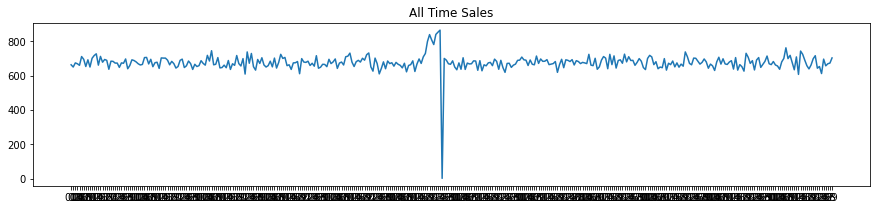

In [20]:
trans_by_date = merge_value["Date"].value_counts()
all_time = trans_by_date[(trans_by_date.index >= pd.datetime(2018,7,1)) & (trans_by_date.index < pd.datetime(2019,6,30))].sort_index()
all_time.index = all_time.index.strftime('%d')
ax = all_time.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(all_time)))
ax.set_xticklabels(all_time.index)
plt.title("All Time Sales")
plt.savefig("All Times Sales.png", bbox_inches="tight")
plt.show()

**December Sales Graph**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


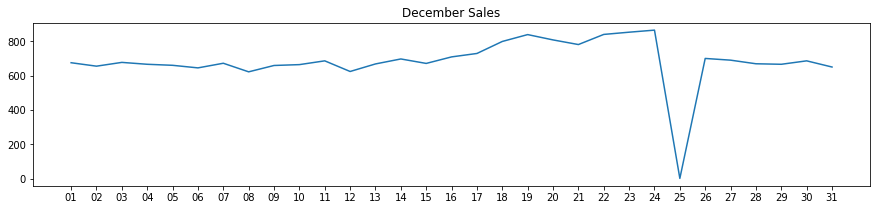

In [21]:
trans_by_date = merge_value["Date"].value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title("December Sales")
plt.savefig("December Sales.png", bbox_inches="tight")
plt.show()

**Explore Product Pack Size**

In [22]:
dataset["Product"] = dataset["Product"].str.replace(r"[0-9]+(G)", "g")
pack_size = dataset["Product"].str.extract(r"([0-9]+[gG])")[0].str.replace("g", "").astype("float")
pack_size[0:4]

0    175.0
1    175.0
2    170.0
3    175.0
Name: 0, dtype: float64

**Summary of Pack Size**

In [23]:
pack_size.describe()

count    240676.000000
mean        175.302286
std          60.014468
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64

**Histogram Showing Transaction Frequency of Pack Size**

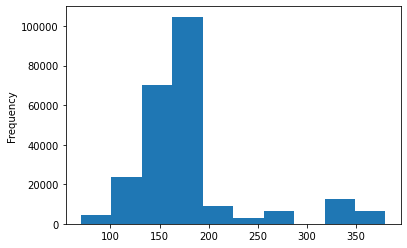

In [24]:
pack_size.plot.hist()
plt.show()

**Frequency of Product Brand Names**

In [25]:
dataset["Product"].str.split().str[0].value_counts()

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: Product, dtype: int64

**Include Brand Name Column**

In [26]:
dataset["Brand"] = dataset["Product"].str.split().str[0]
dataset.head()

,Date,Store Id,Card No,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subcription,Brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle


**Combine Same Brands**

In [27]:
def clean_brand_names(line):
  brand = line["Brand"]
  if brand == "Dorito":
    return "Doritos"
  elif brand == "GrnWves" or brand == "Grain":
    return "Grain Waves"
  elif brand == "Natural" or brand == "NCC":
    return "Natural Chip Co"
  elif brand == "Infzns":
    return "Infuzions"
  elif brand == "Red":
    return "RRD"
  elif brand == "Smith":
    return "Smiths"
  elif brand == "Snbts":
    return "Sunbites"
  elif brand == "WW":
    return "Woolworths"
  else:
    return brand


**Cleaned Transactional Data**

In [28]:
dataset["Brand"] = dataset.apply(lambda line: clean_brand_names(line), axis=1)
dataset.head()

,Date,Store Id,Card No,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subcription,Brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle


**Histogram of Brand Frequency**

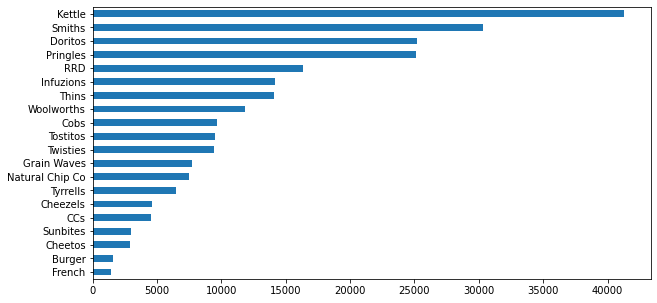

In [29]:
dataset["Brand"].value_counts(ascending = True).plot.barh(figsize = (10 ,5))
plt.show()

# **Data Analysis**

**ENG**

1.   Who Spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behavior is
2.   How many customers are in each segment
3.   How many chips are bought per customer by segment
4.   Whats the average chip price by customer segment



**IND**

1.   Siapa yang Menghabiskan paling banyak untuk chip (penjualan total), menggambarkan pelanggan berdasarkan tahap kehidupan dan seberapa premium perilaku pembelian umum mereka
2.   Berapa banyak pelanggan di setiap segmen?
3.   Berapa banyak chip yang dibeli per pelanggan berdasarkan segmen
4.   Berapa harga rata-rata chip menurut segmen pelanggan?



**Who Spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behavior is**

In [30]:
most_shopping = dataset.groupby(["Group", "Subcription"])["Sales"].agg(["sum"]).sort_values(ascending = False, by ="sum")
most_shopping

sum
Group                  Subcription           
OLDER FAMILIES         Budget       156863.75
YOUNG SINGLES/COUPLES  Mainstream   147582.20
RETIREES               Mainstream   145168.95
YOUNG FAMILIES         Budget       129717.95
OLDER SINGLES/COUPLES  Budget       127833.60
                       Mainstream   124648.50
                       Premium      123537.55
RETIREES               Budget       105916.30
OLDER FAMILIES         Mainstream    96413.55
RETIREES               Premium       91296.65
YOUNG FAMILIES         Mainstream    86338.25
MIDAGE SINGLES/COUPLES Mainstream    84734.25
YOUNG FAMILIES         Premium       78571.70
OLDER FAMILIES         Premium       75242.60
YOUNG SINGLES/COUPLES  Budget        57122.10
MIDAGE SINGLES/COUPLES Premium       54443.85
YOUNG SINGLES/COUPLES  Premium       39052.30
MIDAGE SINGLES/COUPLES Budget        33345.70
NEW FAMILIES           Budget        20607.45
                       Mainstream    15979.70
                       Premium       10760.80

**Histogram of Customer Segments contibute to Chip Sales**

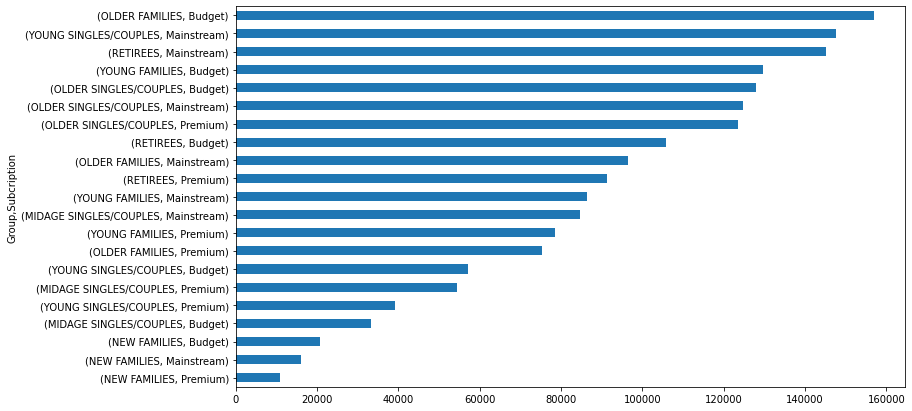

In [31]:
most_shopping["sum"].sort_values().plot.barh(figsize = (12,7))
plt.show()

**Top Total Sales Contributor Segment are**


1.   Older Families (budget) 156,864 dollar
2.   Young Singles,Couples (Mainstream) 147,582 dollar
3.   Retirees (Mainstream) 145,169 dollar



**Top Shopping per Group by Subcriptopn**

In [32]:
stage_agg_prem = dataset.groupby("Group")["Subcription"].agg(pd.Series.mode).sort_values()
print("Top Shopping per Group by Subcriptopn")
print(stage_agg_prem)

Top Shopping per Group by Subcriptopn
Group
NEW FAMILIES                  Budget
OLDER FAMILIES                Budget
OLDER SINGLES/COUPLES         Budget
YOUNG FAMILIES                Budget
MIDAGE SINGLES/COUPLES    Mainstream
RETIREES                  Mainstream
YOUNG SINGLES/COUPLES     Mainstream
Name: Subcription, dtype: object


**How Many Customers are in each segment**

In [33]:
cust_seg = dataset.groupby(["Group", "Subcription"])["Card No"].nunique().sort_values(ascending = False)
pd.DataFrame(cust_seg)

Card No
Group                  Subcription         
YOUNG SINGLES/COUPLES  Mainstream      7917
RETIREES               Mainstream      6358
OLDER SINGLES/COUPLES  Mainstream      4858
                       Budget          4849
                       Premium         4682
OLDER FAMILIES         Budget          4611
RETIREES               Budget          4385
YOUNG FAMILIES         Budget          3953
RETIREES               Premium         3812
YOUNG SINGLES/COUPLES  Budget          3647
MIDAGE SINGLES/COUPLES Mainstream      3298
OLDER FAMILIES         Mainstream      2788
YOUNG FAMILIES         Mainstream      2685
YOUNG SINGLES/COUPLES  Premium         2480
YOUNG FAMILIES         Premium         2398
MIDAGE SINGLES/COUPLES Premium         2369
OLDER FAMILIES         Premium         2231
MIDAGE SINGLES/COUPLES Budget          1474
NEW FAMILIES           Budget          1087
                       Mainstream       830
                       Premium          575

**Histogram of Customer Segments Frequency**

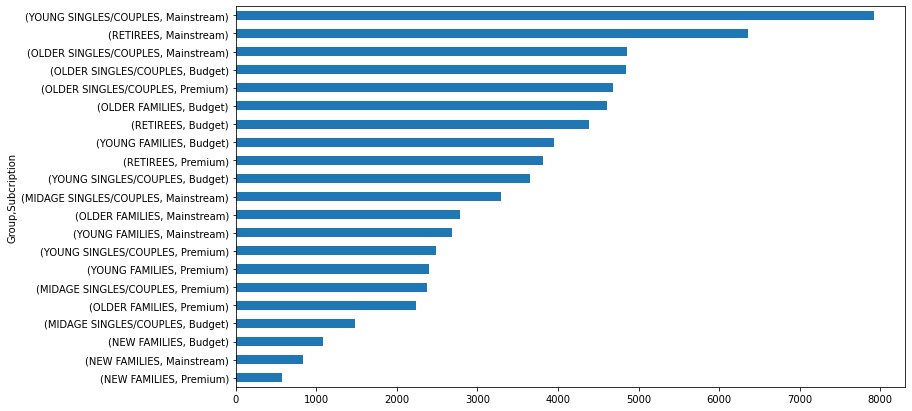

In [34]:
cust_seg.sort_values().plot.barh(figsize = (12,7))
plt.show() 



*   Young Singles/Couples (Mainstream) has the highest population, followed by Retires(Mainstream), Which Explains their high total sales



**How Many Chips Are brought per Customer by segment**

In [35]:
# Individual Customer Chips Shopping by Date
chips_shop_per_segment = dataset.groupby(["Card No", "Group", "Subcription"]).count()["Date"]
chips_shop_per_segment.to_frame()

,,,Date
Card No,Group,Subcription,
1000,YOUNG SINGLES/COUPLES,Premium,1
1002,YOUNG SINGLES/COUPLES,Mainstream,1
1003,YOUNG FAMILIES,Budget,2
1004,OLDER SINGLES/COUPLES,Mainstream,1
1005,MIDAGE SINGLES/COUPLES,Mainstream,1
...,...,...,...
2370651,MIDAGE SINGLES/COUPLES,Mainstream,1
2370701,YOUNG FAMILIES,Mainstream,1
2370751,YOUNG FAMILIES,Premium,1


In [36]:
#Chips Shopping from groups by individual (avg)
segment_shop_chips = chips_shop_per_segment.groupby(["Group", "Subcription"]).agg(["mean"]).sort_values(ascending = False, by = "mean")
segment_shop_chips

mean
Group                  Subcription          
OLDER FAMILIES         Mainstream   4.749283
                       Budget       4.665799
                       Premium      4.662931
YOUNG FAMILIES         Premium      4.497081
                       Budget       4.493549
                       Mainstream   4.449534
OLDER SINGLES/COUPLES  Budget       3.541349
                       Premium      3.536950
                       Mainstream   3.511939
MIDAGE SINGLES/COUPLES Mainstream   3.364160
RETIREES               Budget       3.244014
MIDAGE SINGLES/COUPLES Premium      3.213170
RETIREES               Premium      3.209864
MIDAGE SINGLES/COUPLES Budget       3.182497
RETIREES               Mainstream   3.140925
NEW FAMILIES           Mainstream   2.632530
                       Budget       2.597976
                       Premium      2.587826
YOUNG SINGLES/COUPLES  Mainstream   2.468612
                       Premium      2.359677
                       Budget       2.350699

**Histogram of Chips Shopping by Segment**

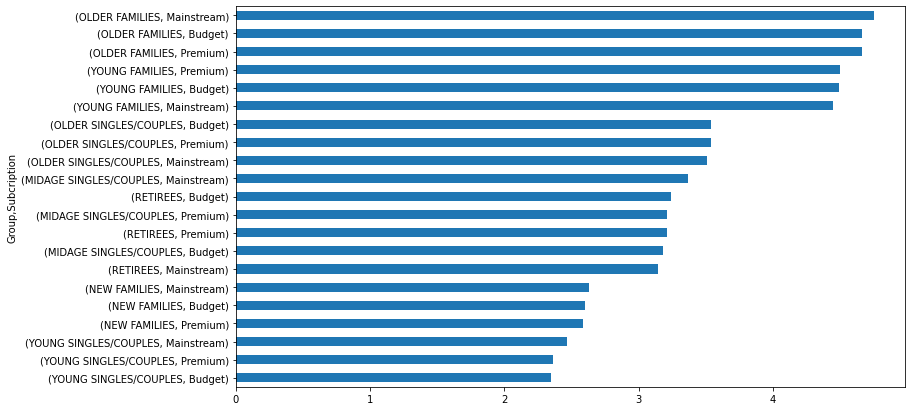

In [37]:
segment_shop_chips["mean"].sort_values().plot.barh(figsize = (12,7))
plt.show()



*   Despite Older Families not having the highest population, they have highest frequency of purchase, which contributes to their high total sales.
*   Older Families followed by Young Families has the highest average quantity of chips bought per purchase



**What's the average chip price by customer segment**

In [38]:
avg_chips_price_cust_segment = dataset.groupby(["Group", "Subcription"])["Sales"].agg(["mean"]).sort_values(ascending = False, by = "mean")
avg_chips_price_cust_segment

,,mean
Group,Subcription,
MIDAGE SINGLES/COUPLES,Mainstream,7.637156
YOUNG SINGLES/COUPLES,Mainstream,7.551279
RETIREES,Premium,7.461315
OLDER SINGLES/COUPLES,Premium,7.459997
RETIREES,Budget,7.445786
OLDER SINGLES/COUPLES,Budget,7.444305
NEW FAMILIES,Mainstream,7.313364
OLDER SINGLES/COUPLES,Mainstream,7.306049
YOUNG FAMILIES,Budget,7.302705


**Histogram Average chip price by customer segment**

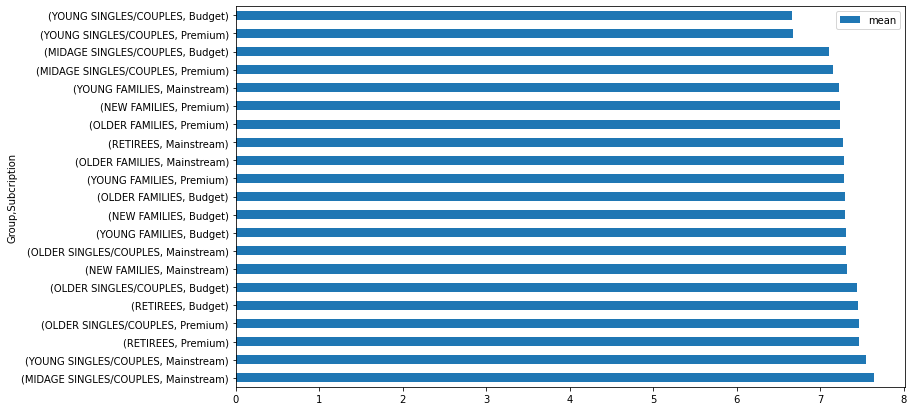

In [39]:
avg_chips_price_cust_segment.plot.barh(figsize = (12,7))

*   The mainstream category of the "Young and Midage Singles/Couples" have the highest spending of chips per purchase. And the difference to the non-Mainstream "Young and Midage Singles/Couples" are statiscally significant

# **T-Test**

The difference between their Mainstream and Non-Mainstream group might seem insignificant (7.6 vs 6.6), but we'll find out by examining if the difference is statistically significant.

In [40]:
mainstream = dataset["Subcription"] == "Mainstream"
budget_premium = (dataset["Subcription"] == "Budget") | (dataset["Subcription"] == "Premium")
young_midage = (dataset["Group"] == "MIDAGE SINGLES/COUPLES") | (dataset["Group"] == "YOUNG SINGLES/COUPLES")

a = dataset[young_midage & mainstream]["Sales"]
b = dataset[young_midage & budget_premium]["Sales"]

stat, pval = ttest_ind(a.values, b.values, equal_var = False)
print(pval)
pval < 0.0000001

1.834645908180742e-237


True

*   P-Value is close to 0. There is a statistically significant difference to the Total Sales between the "Mainstream Young Midage" segment to the "Budget and Premium Young Midage" segment.

**Examine What brand of chips the top 3 segments contributing to Total Sales are Buying**

In [41]:
dataset.groupby(["Group", "Subcription"])["Brand"].agg(pd.Series.mode).sort_values().to_frame()

Brand
Group                  Subcription        
MIDAGE SINGLES/COUPLES Budget       Kettle
YOUNG SINGLES/COUPLES  Budget       Kettle
YOUNG FAMILIES         Premium      Kettle
                       Mainstream   Kettle
                       Budget       Kettle
RETIREES               Premium      Kettle
                       Mainstream   Kettle
                       Budget       Kettle
OLDER SINGLES/COUPLES  Premium      Kettle
YOUNG SINGLES/COUPLES  Mainstream   Kettle
OLDER SINGLES/COUPLES  Mainstream   Kettle
OLDER FAMILIES         Premium      Kettle
                       Mainstream   Kettle
                       Budget       Kettle
NEW FAMILIES           Premium      Kettle
                       Mainstream   Kettle
                       Budget       Kettle
MIDAGE SINGLES/COUPLES Premium      Kettle
                       Mainstream   Kettle
OLDER SINGLES/COUPLES  Budget       Kettle
YOUNG SINGLES/COUPLES  Premium      Kettle

* Chips brand Kettle is Dominating every segment as the most purchased brand

========== YOUNG SINGLES/COUPLES - Premium ==========
Kettle      838
Smiths      787
Pringles    537
Name: Brand, dtype: int64


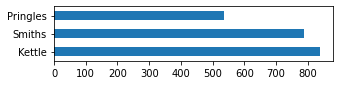

========== YOUNG SINGLES/COUPLES - Budget ==========
Kettle      1211
Smiths      1185
Pringles     832
Name: Brand, dtype: int64


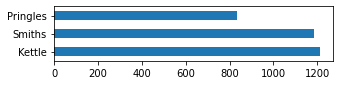

========== YOUNG SINGLES/COUPLES - Mainstream ==========
Kettle      3844
Doritos     2379
Pringles    2315
Name: Brand, dtype: int64


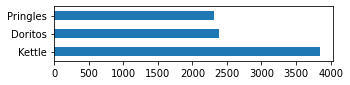

========== MIDAGE SINGLES/COUPLES - Premium ==========
Kettle      1206
Smiths       923
Pringles     781
Name: Brand, dtype: int64


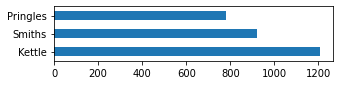

========== MIDAGE SINGLES/COUPLES - Budget ==========
Kettle     713
Smiths     591
Doritos    479
Name: Brand, dtype: int64


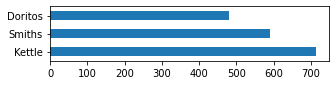

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
Kettle     2136
Smiths     1276
Doritos    1210
Name: Brand, dtype: int64


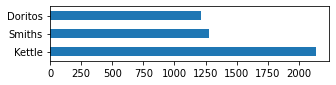

========== NEW FAMILIES - Premium ==========
Kettle      247
Pringles    165
Smiths      155
Name: Brand, dtype: int64


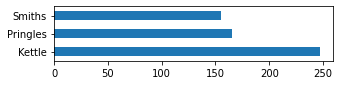

========== NEW FAMILIES - Budget ==========
Kettle     510
Smiths     328
Doritos    315
Name: Brand, dtype: int64


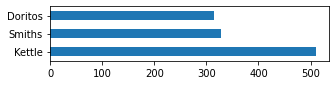

========== NEW FAMILIES - Mainstream ==========
Kettle     414
Doritos    257
Smiths     244
Name: Brand, dtype: int64


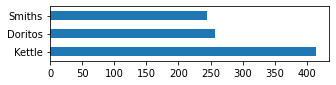

========== OLDER FAMILIES - Premium ==========
Kettle      1512
Smiths      1448
Pringles    1014
Name: Brand, dtype: int64


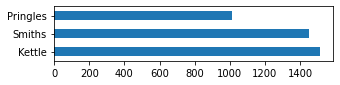

========== OLDER FAMILIES - Budget ==========
Kettle     3320
Smiths     2948
Doritos    2032
Name: Brand, dtype: int64


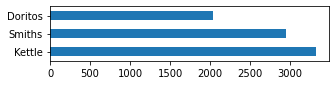

========== OLDER FAMILIES - Mainstream ==========
Kettle     2019
Smiths     1742
Doritos    1263
Name: Brand, dtype: int64


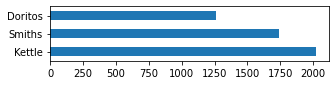

========== OLDER SINGLES/COUPLES - Premium ==========
Kettle     2947
Smiths     1952
Doritos    1784
Name: Brand, dtype: int64


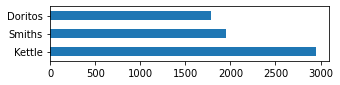

========== OLDER SINGLES/COUPLES - Budget ==========
Kettle      3065
Smiths      2010
Pringles    1843
Name: Brand, dtype: int64


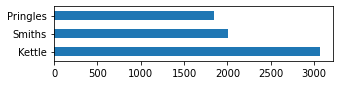

========== OLDER SINGLES/COUPLES - Mainstream ==========
Kettle     2835
Smiths     2070
Doritos    1791
Name: Brand, dtype: int64


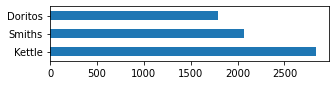

========== RETIREES - Premium ==========
Kettle      2216
Smiths      1395
Pringles    1331
Name: Brand, dtype: int64


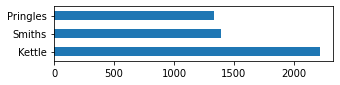

========== RETIREES - Budget ==========
Kettle     2592
Smiths     1612
Doritos    1592
Name: Brand, dtype: int64


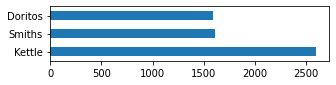

========== RETIREES - Mainstream ==========
Kettle      3386
Smiths      2367
Pringles    2103
Name: Brand, dtype: int64


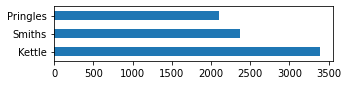

========== YOUNG FAMILIES - Premium ==========
Kettle      1745
Smiths      1384
Pringles    1007
Name: Brand, dtype: int64


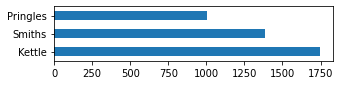

========== YOUNG FAMILIES - Budget ==========
Kettle     2743
Smiths     2334
Doritos    1767
Name: Brand, dtype: int64


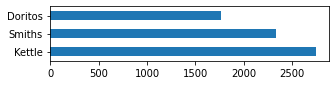

========== YOUNG FAMILIES - Mainstream ==========
Kettle      1789
Smiths      1681
Pringles    1148
Name: Brand, dtype: int64


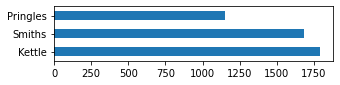

In [42]:
for stage in dataset["Group"].unique():
  for subs in dataset["Subcription"].unique():
    print("==========", stage, "-", subs, "==========")
    summary = dataset[(dataset["Group"] == stage) & (dataset["Subcription"] == subs)]["Brand"].value_counts().head(3)
    print(summary)
    plt.figure()
    summary.plot.barh(figsize = (5,1))
    plt.show()

* Every segment had Kettle as the most purchased brand. Every segment except "Young Singles/Couples Mainstrem" had Smiths as their Second most Purchased brand. "Young Singles/Couples Mainstream" had Doritos as theie second most purchased brand.

**Examine if our target segments tends to buy larger packs of chips**

In [44]:
#merge dataset with pack size
merged_pack = pd.concat([dataset, pack_size.rename("Size")], axis =1)
merged_pack.head()


,Date,Store Id,Card No,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subcription,Brand,Size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Co,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,175.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,150.0


========== YOUNG SINGLES/COUPLES - Premium ==========
175.0    1587
150.0     896
134.0     537
Name: Size, dtype: int64


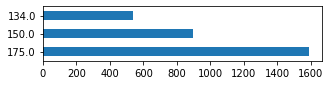

========== YOUNG SINGLES/COUPLES - Budget ==========
175.0    2262
150.0    1325
134.0     832
Name: Size, dtype: int64


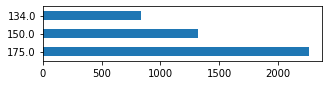

========== YOUNG SINGLES/COUPLES - Mainstream ==========
175.0    4928
150.0    2998
134.0    2315
Name: Size, dtype: int64


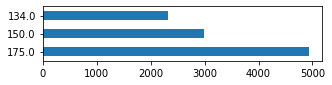

========== MIDAGE SINGLES/COUPLES - Premium ==========
175.0    2034
150.0    1163
134.0     781
Name: Size, dtype: int64


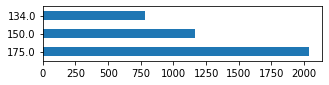

========== MIDAGE SINGLES/COUPLES - Budget ==========
175.0    1256
150.0     746
134.0     449
Name: Size, dtype: int64


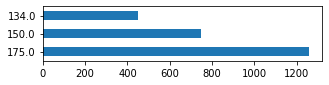

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
175.0    2912
150.0    1714
134.0    1159
Name: Size, dtype: int64


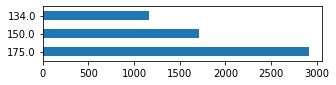

========== NEW FAMILIES - Premium ==========
175.0    371
150.0    225
134.0    165
Name: Size, dtype: int64


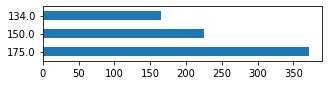

========== NEW FAMILIES - Budget ==========
175.0    763
150.0    425
134.0    309
Name: Size, dtype: int64


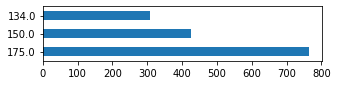

========== NEW FAMILIES - Mainstream ==========
175.0    579
150.0    362
134.0    224
Name: Size, dtype: int64


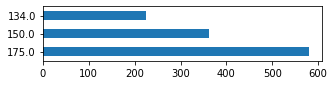

========== OLDER FAMILIES - Premium ==========
175.0    2747
150.0    1607
134.0    1014
Name: Size, dtype: int64


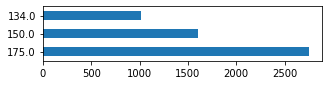

========== OLDER FAMILIES - Budget ==========
175.0    5662
150.0    3414
134.0    1996
Name: Size, dtype: int64


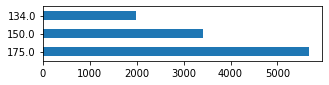

========== OLDER FAMILIES - Mainstream ==========
175.0    3489
150.0    2091
134.0    1234
Name: Size, dtype: int64


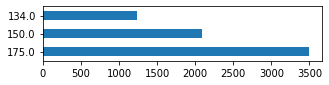

========== OLDER SINGLES/COUPLES - Premium ==========
175.0    4382
150.0    2672
134.0    1744
Name: Size, dtype: int64


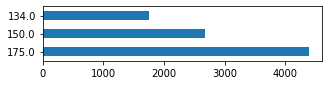

========== OLDER SINGLES/COUPLES - Budget ==========
175.0    4535
150.0    2726
134.0    1843
Name: Size, dtype: int64


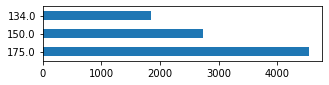

========== OLDER SINGLES/COUPLES - Mainstream ==========
175.0    4422
150.0    2660
134.0    1720
Name: Size, dtype: int64


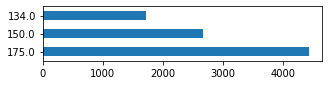

========== RETIREES - Premium ==========
175.0    3232
150.0    1883
134.0    1331
Name: Size, dtype: int64


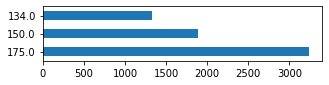

========== RETIREES - Budget ==========
175.0    3768
150.0    2242
134.0    1517
Name: Size, dtype: int64


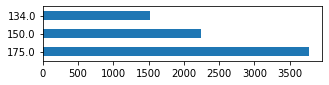

========== RETIREES - Mainstream ==========
175.0    5187
150.0    3183
134.0    2103
Name: Size, dtype: int64


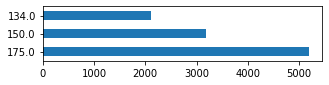

========== YOUNG FAMILIES - Premium ==========
175.0    2926
150.0    1697
134.0    1007
Name: Size, dtype: int64


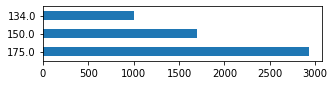

========== YOUNG FAMILIES - Budget ==========
175.0    4800
150.0    2749
134.0    1674
Name: Size, dtype: int64


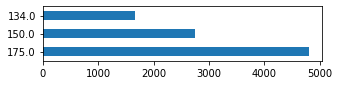

========== YOUNG FAMILIES - Mainstream ==========
175.0    3087
150.0    1927
134.0    1148
Name: Size, dtype: int64


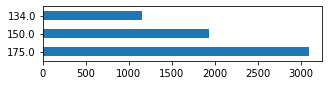

In [47]:
for stage in merged_pack["Group"].unique():
  for subs in merged_pack["Subcription"].unique():
    print("==========", stage, "-", subs, "==========")
    summary = merged_pack[(merged_pack["Group"] == stage) & (merged_pack["Subcription"] == subs)]["Size"].value_counts().head(3)
    print(summary)
    plt.figure()
    summary.plot.barh(figsize = (5,1))
    plt.show()

* Most frequent chip size purchased is 175gr followed by the 150gr chip size for all segments.

**Average amount of chips bought per customer segment.**

In [48]:
avg_chips = (dataset.groupby(["Group", "Subcription"])["Quantity"].sum() / dataset.groupby(["Group", "Subcription"])["Card No"].nunique()).sort_values(ascending=False).to_frame()
avg_chips

0
Group                  Subcription          
OLDER FAMILIES         Mainstream   9.255380
                       Budget       9.076773
                       Premium      9.071717
YOUNG FAMILIES         Budget       8.722995
                       Premium      8.716013
                       Mainstream   8.638361
OLDER SINGLES/COUPLES  Budget       6.781398
                       Premium      6.769543
                       Mainstream   6.712021
MIDAGE SINGLES/COUPLES Mainstream   6.432080
RETIREES               Budget       6.141847
                       Premium      6.103358
MIDAGE SINGLES/COUPLES Premium      6.078514
                       Budget       6.026459
RETIREES               Mainstream   5.925920
NEW FAMILIES           Mainstream   4.891566
                       Budget       4.821527
                       Premium      4.815652
YOUNG SINGLES/COUPLES  Mainstream   4.575597
                       Premium      4.264113
                       Budget       4.250069

**Histogram Average amount of chips bouth per customer segment.**

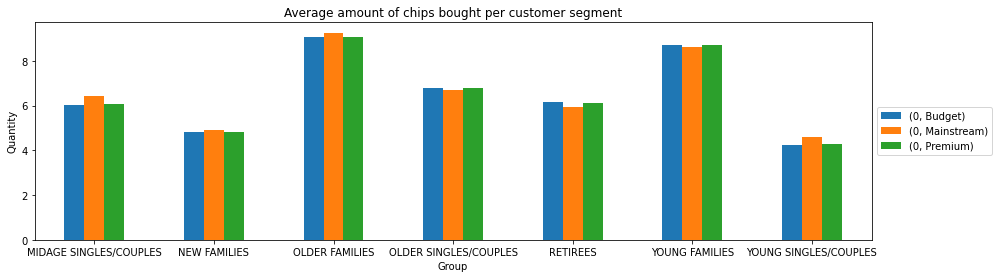

In [50]:
avg_chips.unstack().plot.bar(figsize = (15,4), rot = 0)
plt.title("Average amount of chips bought per customer segment")
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Quantity")
plt.show()

**Average chips price per transaction by segments.**

In [52]:
dataset["Unit Price"] = dataset["Sales"] / dataset["Quantity"]
chips_segment = dataset.groupby(["Group", "Subcription"]).mean()["Unit Price"].sort_values(ascending = False).to_frame()
chips_segment

Unit Price
Group                  Subcription            
YOUNG SINGLES/COUPLES  Mainstream     4.065642
MIDAGE SINGLES/COUPLES Mainstream     3.994241
RETIREES               Budget         3.924404
                       Premium        3.920942
NEW FAMILIES           Budget         3.917688
                       Mainstream     3.916133
OLDER SINGLES/COUPLES  Premium        3.893182
                       Budget         3.882096
NEW FAMILIES           Premium        3.872110
RETIREES               Mainstream     3.844294
OLDER SINGLES/COUPLES  Mainstream     3.814665
MIDAGE SINGLES/COUPLES Premium        3.770698
YOUNG FAMILIES         Premium        3.762150
                       Budget         3.760737
OLDER FAMILIES         Budget         3.745340
MIDAGE SINGLES/COUPLES Budget         3.743328
OLDER FAMILIES         Mainstream     3.737077
YOUNG FAMILIES         Mainstream     3.724533
OLDER FAMILIES         Premium        3.717000
YOUNG SINGLES/COUPLES  Premium        3.665414
                       Budget         3.657366

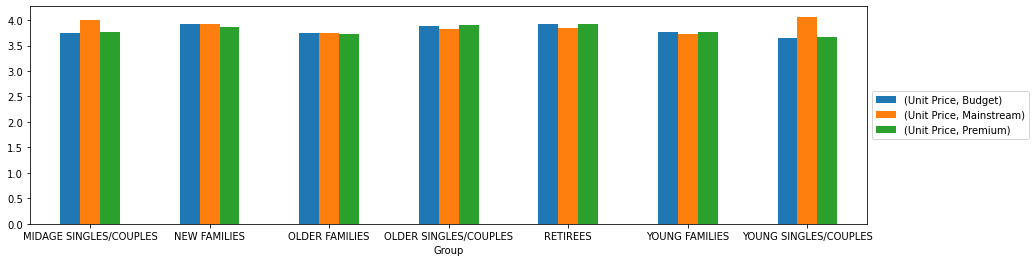

In [53]:
chips_segment.unstack().plot.bar(figsize = (15,4), rot = 0)
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.show()